In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "10658a9dd057699bbb3b7b602f2a92d4"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10658a9dd057699bbb3b7b602f2a92d4


In [5]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10658a9dd057699bbb3b7b602f2a92d4&q=Boston


In [6]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
coordinates = lat_lngs
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
    # Log the URL, record, and set numbers and the city.
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        # Add 1 to the record count.
        record_count += 1

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 1 of Set 2 | sirfa
City not found. Skipping...
Processing Record 2 of Set 2 | vaitupu
City not found. Skipping...
Processing Record 1 of Set 3 | sorvag
City not found. Skipping...
Processing Record 2 of Set 3 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 3 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 3 | zlatoustovsk
City not found. Skipping...
Processing Record 5 of Set 3 | attawapiskat
City not found. Skipping...
Processing Record 1 of Set 4 | amderma
City not found. Skip

In [12]:
len(city_data)

545

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.47,82,79,15.70,PF,2022-07-17 20:05:35
1,Manadhoo,5.7667,73.3833,79.74,82,100,23.58,MV,2022-07-17 20:05:36
2,Esperance,-33.8667,121.9000,53.08,92,100,9.28,AU,2022-07-17 20:05:36
3,Nortelandia,-14.4547,-56.8028,90.18,32,0,6.58,BR,2022-07-17 20:05:36
4,Sitka,57.0531,-135.3300,55.29,94,100,6.91,US,2022-07-17 20:05:37
5,Buin,-33.7333,-70.7500,56.88,51,100,1.63,CL,2022-07-17 20:05:37
6,Ushuaia,-54.8000,-68.3000,38.86,52,20,5.75,AR,2022-07-17 20:05:37
7,Coronado,32.6859,-117.1831,96.28,74,75,13.80,US,2022-07-17 20:05:37
8,Port Hardy,50.6996,-127.4199,59.92,75,16,12.53,CA,2022-07-17 20:02:25
9,Hobart,-42.8794,147.3294,39.06,83,40,18.41,AU,2022-07-17 20:01:39


In [37]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [51]:
city_data_df = city_data_df[new_column_order]

In [52]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-07-17 20:05:35,-23.1203,-134.9692,73.47,82,79,15.70
1,Manadhoo,MV,2022-07-17 20:05:36,5.7667,73.3833,79.74,82,100,23.58
2,Esperance,AU,2022-07-17 20:05:36,-33.8667,121.9000,53.08,92,100,9.28
3,Nortelandia,BR,2022-07-17 20:05:36,-14.4547,-56.8028,90.18,32,0,6.58
4,Sitka,US,2022-07-17 20:05:37,57.0531,-135.3300,55.29,94,100,6.91
5,Buin,CL,2022-07-17 20:05:37,-33.7333,-70.7500,56.88,51,100,1.63
6,Ushuaia,AR,2022-07-17 20:05:37,-54.8000,-68.3000,38.86,52,20,5.75
7,Coronado,US,2022-07-17 20:05:37,32.6859,-117.1831,96.28,74,75,13.80
8,Port Hardy,CA,2022-07-17 20:02:25,50.6996,-127.4199,59.92,75,16,12.53
9,Hobart,AU,2022-07-17 20:01:39,-42.8794,147.3294,39.06,83,40,18.41


In [53]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [54]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

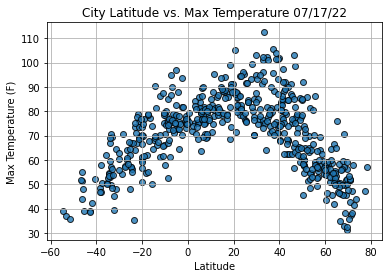

In [55]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()